# model output csv 불러오기

사전 작업
1. submission 형태의 csv 파일을 현재 notebook 폴더 내로 이동시켜주세요!
2. 밑의 코드에서 csv에 포함된 image_id를 읽을 수 있게 경로를 지정해주세요!

In [69]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random

In [2]:
output_csv = pd.read_csv('./submission_latest.csv')

In [4]:
output_csv

PredictionString       image_id
0     0 0.25862667 479.2036 584.13153 559.4402 653.4...  test/0000.jpg
1     0 0.50291836 759.3235 662.0857 895.9851 985.21...  test/0001.jpg
2     0 0.34638217 502.30322 572.51776 763.3213 665....  test/0002.jpg
3     0 0.28368825 176.5373 264.46695 919.58356 814....  test/0003.jpg
4     0 0.6683752 424.20218 368.84775 675.4613 555.2...  test/0004.jpg
...                                                 ...            ...
4866  0 0.3950603 296.40088 346.6645 665.0628 695.01...  test/4866.jpg
4867  0 0.099524364 632.3396 672.30835 783.89526 721...  test/4867.jpg
4868  0 0.32432875 546.7268 509.1074 739.4675 821.81...  test/4868.jpg
4869  0 0.83342355 505.97928 405.1951 651.2801 479.6...  test/4869.jpg
4870  0 0.11402515 240.16656 821.9181 290.93768 855....  test/4870.jpg

[4871 rows x 2 columns]

In [8]:
# output_csv['PredictionString'] : str 형태
# 띄어쓰기를 기준으로 split 후, Bbox 크기만큼 재조합

In [64]:
# 필요에 맞게 image_dir를 수정해주세요!
image_dir = '../../dataset/'
b_box_info = []

for pred_str in output_csv['PredictionString']:
    
    # 해당 image에 대해 탐지한 Bbox가 없는 경우, 빈 list를 넣어준다.
    if type(pred_str) != str:
        b_box_info.append([])
        continue
        
    # 띄어쓰기를 기준으로 split
    split_pred_str = str.split(pred_str)
    split_pred_str = list(map(float, split_pred_str))

    # 한 Bbox를 나타내는 데 6개의 index 정보를 사용하므로, 6개 단위로 list로 만들어 b_box_info에 append
    grouped_pred_str = [split_pred_str[i:i+6] for i in range(0, len(split_pred_str), 6)]
    b_box_info.append(grouped_pred_str)
    
# b_box_info : [image 수, detecting한 box 수, 6] shape를 갖게 된다.

# 첫 6개 image visualizing

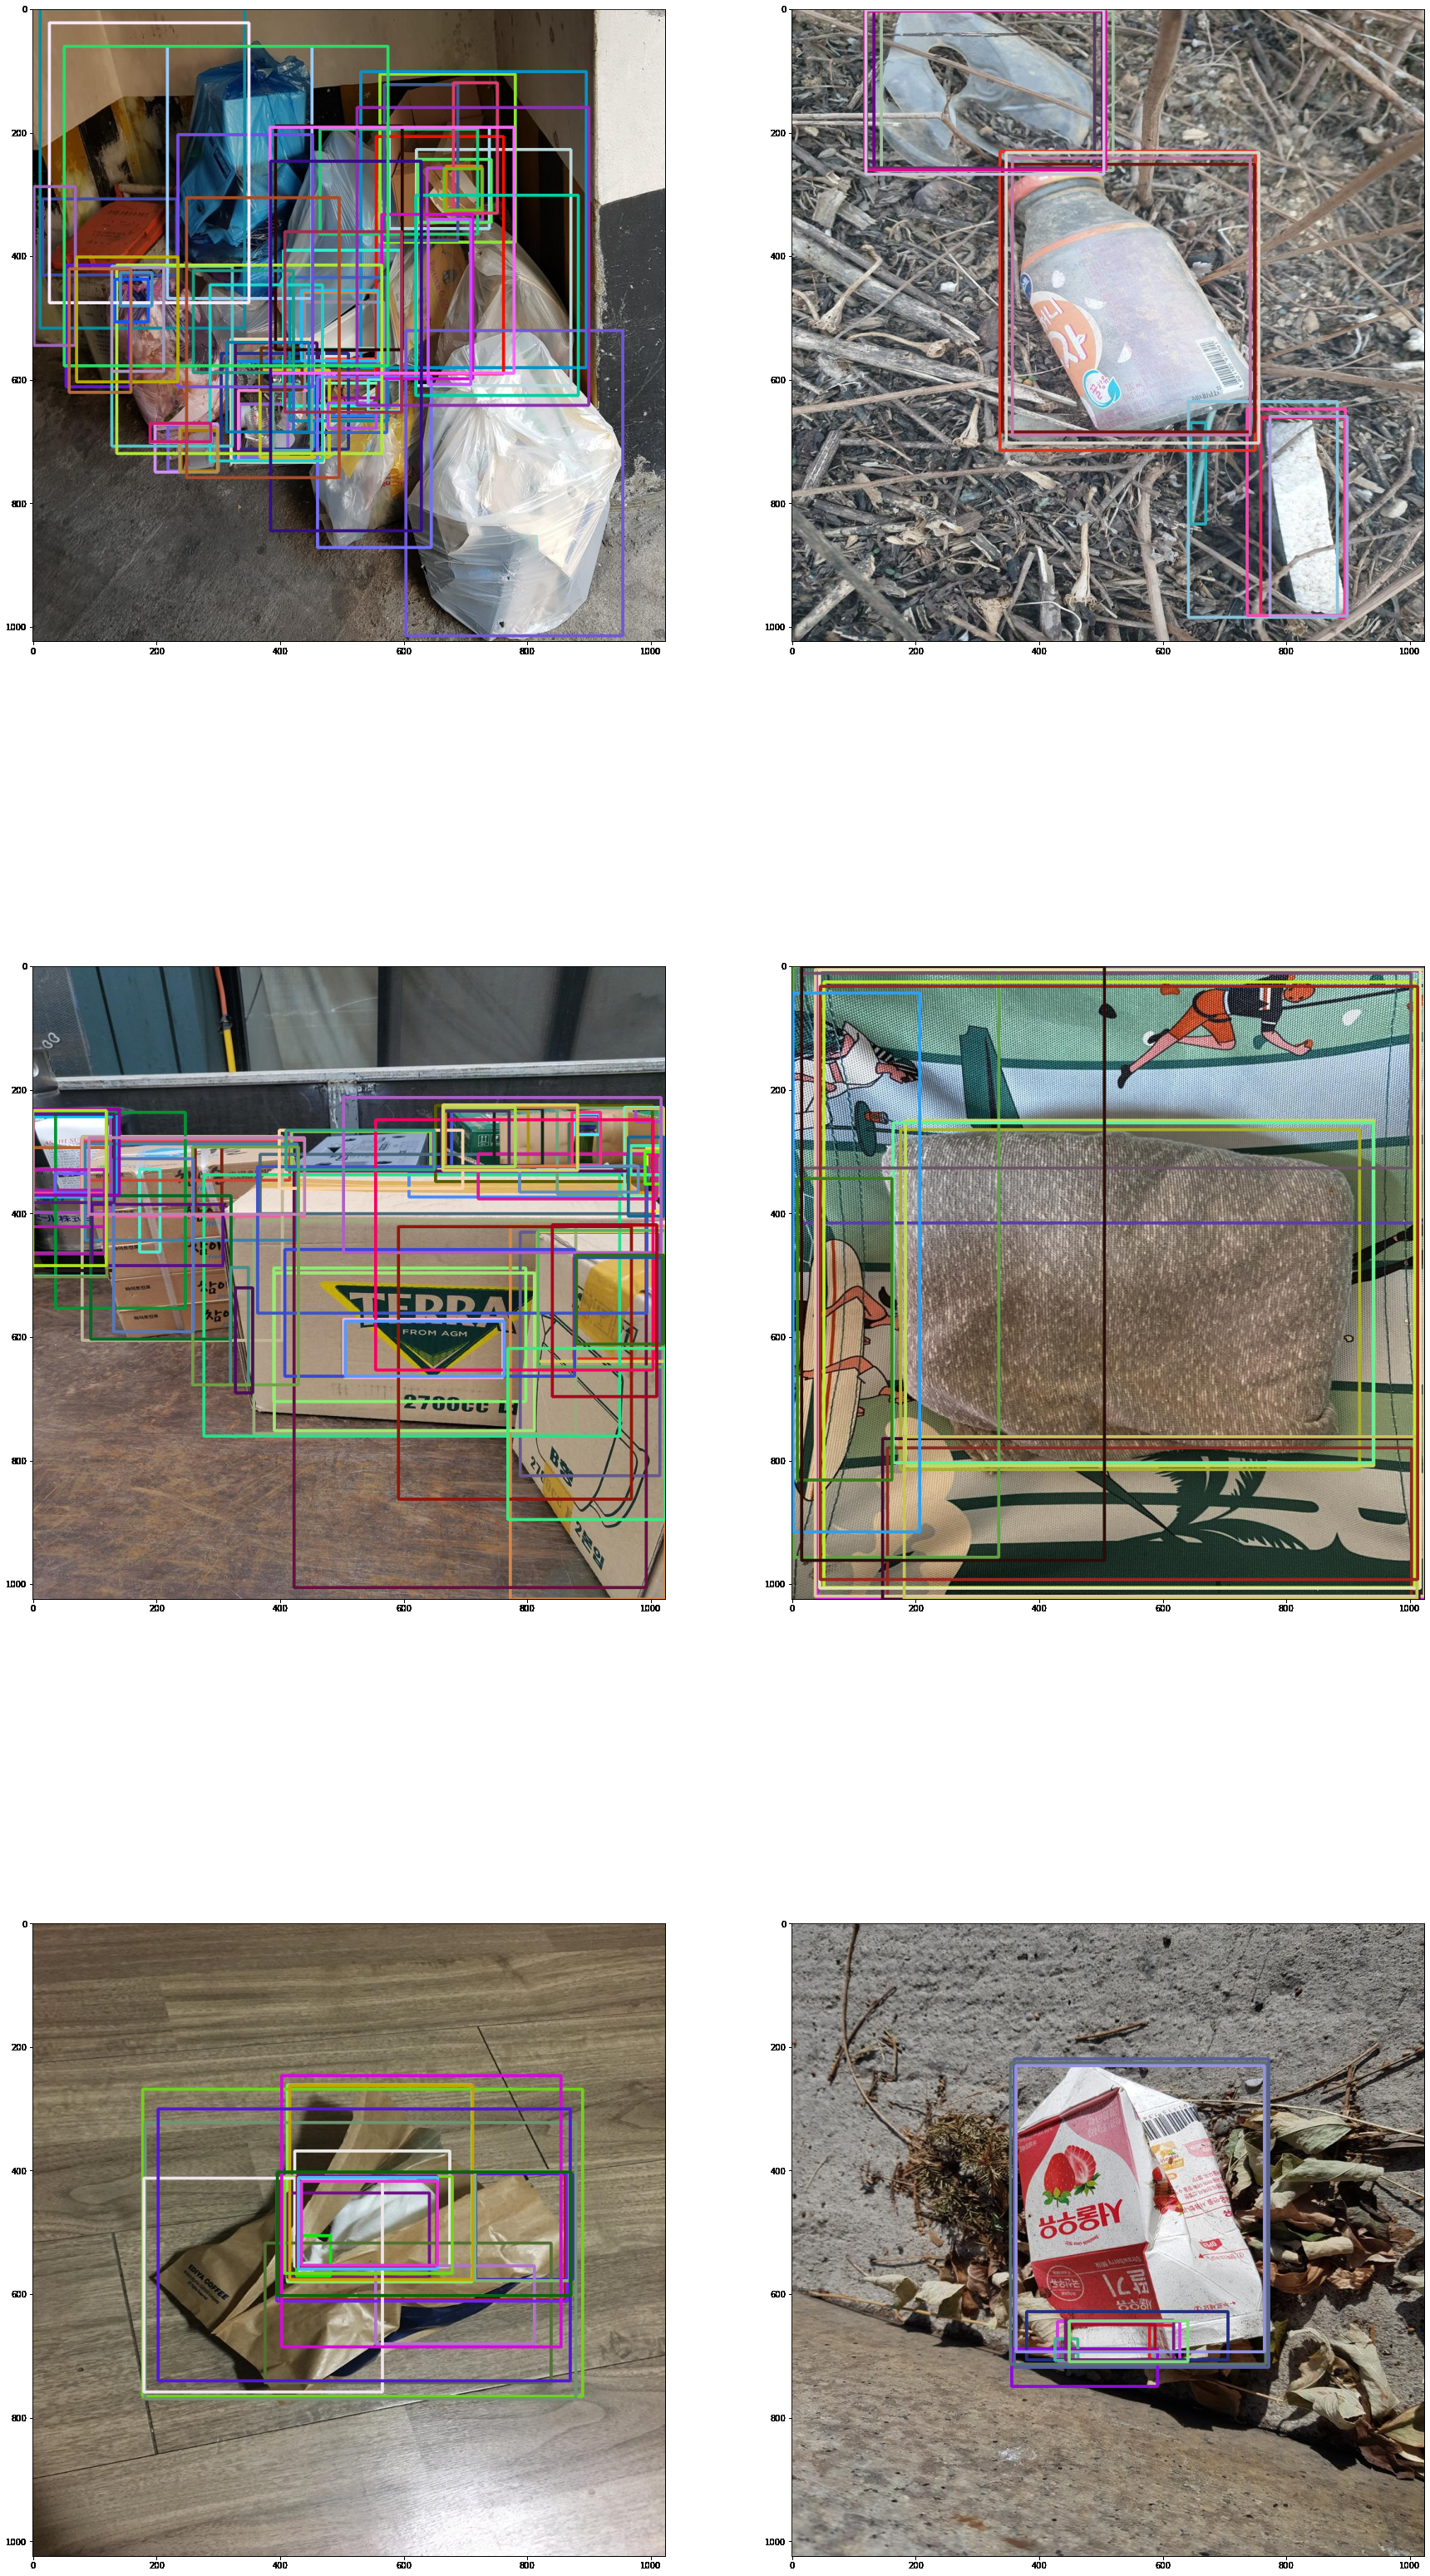

In [82]:
fig = plt.figure(figsize=(30, 60))

for i in range(len(output_csv['image_id'])):
    image = cv2.imread(image_dir + output_csv['image_id'][i], cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for box in b_box_info[i]:
        x_min, y_min, x_max, y_max = map(int, [box[2], box[3], box[4], box[5]])
        image = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), 
                              (random.randint(0,255),random.randint(0,255),random.randint(0,255)), 3)
        ax = fig.add_subplot(3, 2, i+1)
        ax.imshow(image)
    if i==5:
        break
plt.show()
    


# random image visualizing

3373


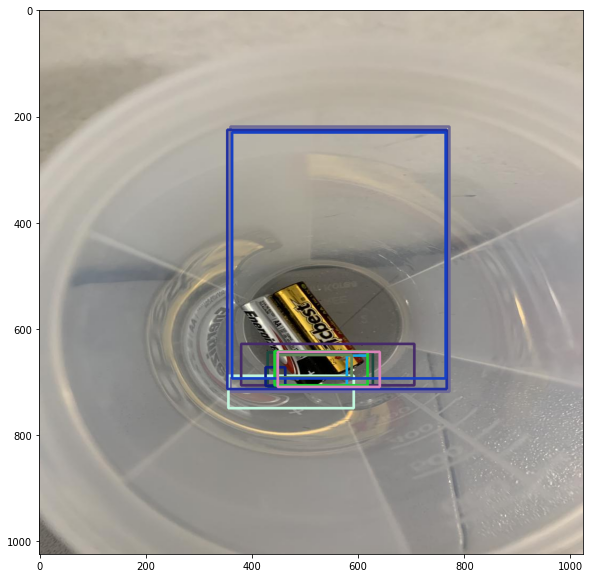

In [91]:
img_num = random.randint(0, len(output_csv['image_id']))
print(img_num)
fig = plt.figure(figsize=(10, 10))

image = cv2.imread(image_dir + output_csv['image_id'][img_num], cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
for box in b_box_info[i]:
    x_min, y_min, x_max, y_max = map(int, [box[2], box[3], box[4], box[5]])
    image = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), 
                          (random.randint(0,255),random.randint(0,255),random.randint(0,255)), 3)

plt.imshow(image)
    